# step1: import dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/sujal7899/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data_set=pd.read_csv("diabetes.csv")

In [5]:
data_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# step 2: data inspection and mapulation

In [6]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data_set[data_set['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [109]:
from sklearn.impute import KNNImputer


data_set[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']] = data_set[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']].replace(0, np.nan)


imputer = KNNImputer(n_neighbors=8) 


df=  pd.DataFrame(imputer.fit_transform(data_set), columns=data_set.columns) 

print(df.isnull().sum()) 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [110]:
print(df['Glucose'].mean())
print(data_set['Glucose'].mean())

121.61686197916667
121.6867627785059


# step 3: data visualization

Text(0.5, 1.0, 'Correlation Heatmap')

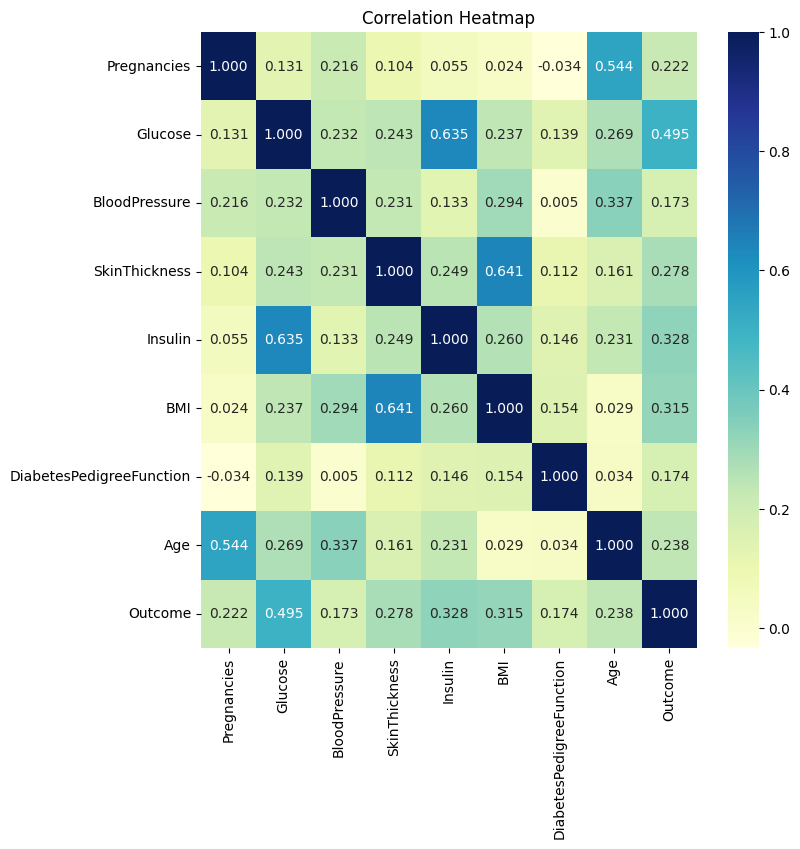

In [111]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt=".3f",cmap="YlGnBu")
plt.title("Correlation Heatmap")

/tmp/ipykernel_1220/1273683673.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(df['Pregnancies'][df['Outcome']==1],color='Green',shade = True)
/tmp/ipykernel_1220/1273683673.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(df['Pregnancies'][df['Outcome']==0],color='Red',shade = True)


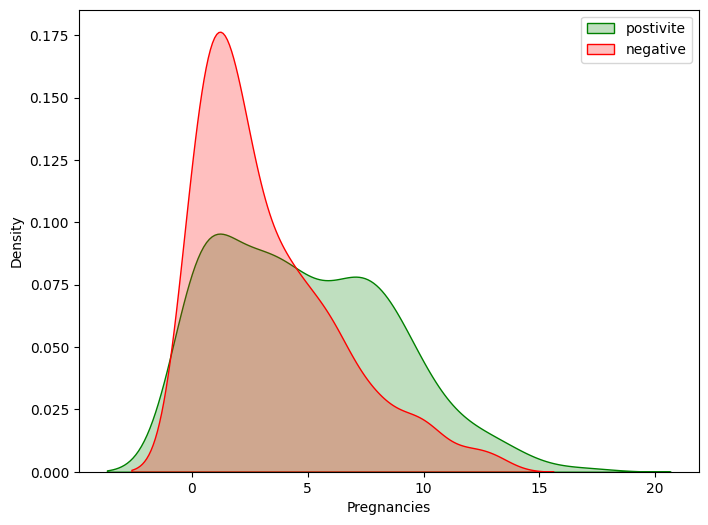

In [112]:
plt.figure(figsize=(8,6))
kde=sns.kdeplot(df['Pregnancies'][df['Outcome']==1],color='Green',shade = True)
kde=sns.kdeplot(df['Pregnancies'][df['Outcome']==0],color='Red',shade = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(['postivite','negative'])

Text(0, 0.5, 'glucose level')

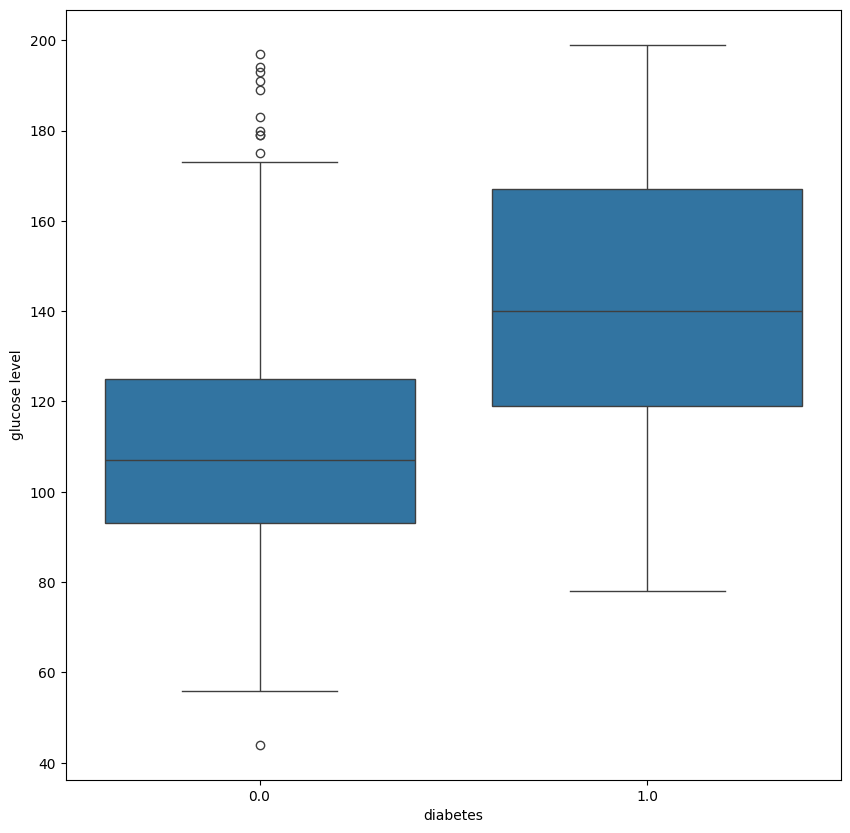

In [113]:
plt.figure(figsize= (10,10))
sns.boxplot(x='Outcome',y='Glucose',data = df)
plt.xlabel("diabetes")
plt.ylabel("glucose level")

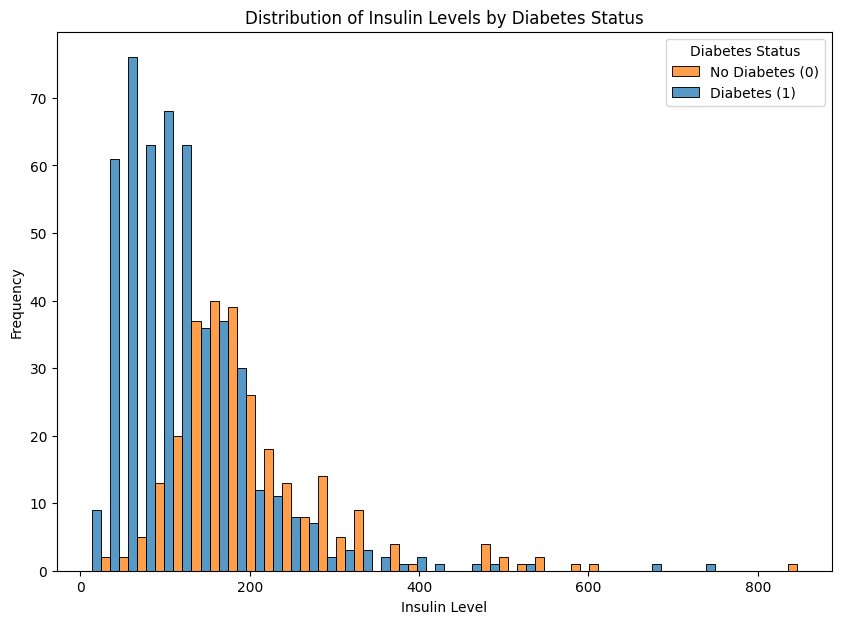

In [114]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='Insulin',hue='Outcome',multiple='dodge')
plt.title('Distribution of Insulin Levels by Diabetes Status')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.legend(title='Diabetes Status', labels=['No Diabetes (0)', 'Diabetes (1)'])

# step4: Data preparation

In [115]:
x=df.drop(['Outcome'],axis=1)
y= df["Outcome"]

In [116]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000,176.250,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000,61.500,26.6,0.351,31.0
2,8.0,183.0,64.0,26.375,174.625,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000,94.000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000,168.000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000,180.000,32.9,0.171,63.0
764,2.0,122.0,70.0,27.000,168.875,36.8,0.340,27.0
765,5.0,121.0,72.0,23.000,112.000,26.2,0.245,30.0
766,1.0,126.0,60.0,33.750,150.875,30.1,0.349,47.0


In [117]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

# step5: Build ML model

In [129]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)

    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test,y_test))
    

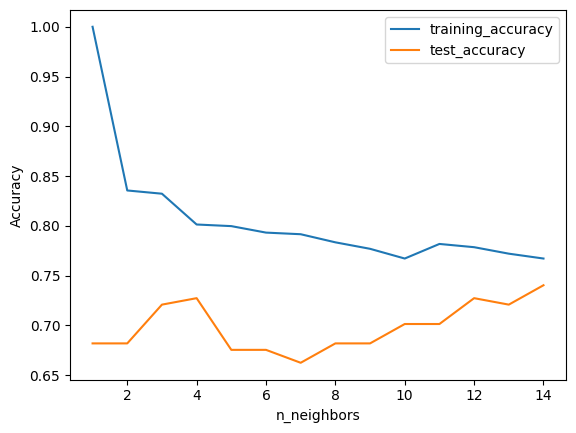

In [130]:
plt.plot(range(1,15),training_accuracy,label="training_accuracy")
plt.plot(range(1,15),test_accuracy,label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [131]:
knn= KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train,y_train)
print("training accuracy: " ,knn.score(x_train,y_train))
print("test accuracy: " ,knn.score(x_test,y_test))


training accuracy:  0.7671009771986971
test accuracy:  0.7402597402597403


In [144]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=42,max_depth = 3)
dt.fit(x_train,y_train)
print("training accuracy: " ,dt.score(x_train,y_train))
print("test accuracy: " ,dt.score(x_test,y_test))

training accuracy:  0.7947882736156352
test accuracy:  0.7012987012987013
